In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display
import matplotlib
from scipy.ndimage import uniform_filter
from sklearn.kernel_approximation import RBFSampler
from tqdm import tqdm

In [2]:
def epsilon_greedy(model, s, eps=0.1):
    p = np.random.random()
    if p < (1 - eps):
        values = model.predict_all_actions(s)
        return np.argmax(values)
    else:
        return model.env.action_space.sample()

In [3]:
def gather_samples(env, n_episodes=1000):
    samples = []
    for _ in tqdm(range(n_episodes), desc="Gathering samples...   "):
        s, _ = env.reset()
        done = False
        while not done:
            a = env.action_space.sample()
            sa = np.concatenate((s, [a]))
            samples.append(sa)
            s, r, done, _, _ = env.step(a)
    return samples

In [4]:
class Model:
    def __init__(self, env):
        # fit the featurizer to data
        self.env = env
        samples = gather_samples(env)
        self.featurizer = RBFSampler()
        self.featurizer.fit(samples)
        dims = self.featurizer.n_components

        # initialize linear model weights
        self.w = np.zeros(dims)

    def predict(self, s, a):
        sa = np.concatenate((s, [a]))
        x = self.featurizer.transform([sa])[0]
        return x.dot(self.w)

    def predict_all_actions(self, s):
        return [self.predict(s, a) for a in range(self.env.action_space.n)]

    def grad(self, s, a):
        sa = np.concatenate((s, [a]))
        x = self.featurizer.transform([sa])[0]
        return x

In [5]:
env = gym.make("CartPole-v0")

C:\Users\Victus\anaconda3\envs\tf_gpu\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [6]:
# repeat until convergence
def single_run(alpha = 0.1):
    model = Model(env)
    gamma = 0.9

    reward_hist = np.zeros(shape=(n_episodes,))
    episode_lengths = np.zeros(shape=(n_episodes,))
    mse_per_episode = np.zeros(shape=(n_episodes,))

    for it in range(n_episodes):
        s, _ = env.reset()
        episode_reward = 0
        episode_length = 0
        done = False
        while not done:
            a = epsilon_greedy(model, s)
            s2, r, done, _, _ = env.step(a)

            # get the target
            # TODO

            # update the model
            # TODO

            # accumulate reward
            episode_reward += r
            episode_length += 1

            # update state
            s = s2

        if (it + 1) % 10 == 0:
            print(f"Episode: {it + 1}, Reward: {episode_reward}")

        reward_hist[it] = episode_reward
        episode_lengths[it] = episode_length

    return model, reward_hist, episode_lengths

In [7]:
num_runs = 1
n_episodes = 700

reward_hist_tot1 = np.zeros(shape=(num_runs, n_episodes))
ep_length_tot1 = np.zeros(shape=(num_runs, n_episodes))
# mse_per_episode_tot1 = np.zeros(shape=(num_runs, n_episodes))

model1, reward_hist_tot1, ep_length_tot1 = single_run(alpha=0.05)

Gathering samples...   : 100%|███████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 4906.73it/s]


Episode: 10, Reward: 9.0
Episode: 20, Reward: 10.0
Episode: 30, Reward: 11.0
Episode: 40, Reward: 9.0
Episode: 50, Reward: 9.0
Episode: 60, Reward: 9.0
Episode: 70, Reward: 10.0
Episode: 80, Reward: 8.0
Episode: 90, Reward: 10.0
Episode: 100, Reward: 9.0
Episode: 110, Reward: 9.0
Episode: 120, Reward: 8.0
Episode: 130, Reward: 18.0
Episode: 140, Reward: 24.0
Episode: 150, Reward: 23.0
Episode: 160, Reward: 19.0
Episode: 170, Reward: 19.0
Episode: 180, Reward: 23.0
Episode: 190, Reward: 20.0
Episode: 200, Reward: 22.0
Episode: 210, Reward: 28.0
Episode: 220, Reward: 26.0
Episode: 230, Reward: 26.0
Episode: 240, Reward: 28.0
Episode: 250, Reward: 22.0
Episode: 260, Reward: 25.0
Episode: 270, Reward: 35.0
Episode: 280, Reward: 33.0
Episode: 290, Reward: 20.0
Episode: 300, Reward: 21.0
Episode: 310, Reward: 28.0
Episode: 320, Reward: 23.0
Episode: 330, Reward: 42.0
Episode: 340, Reward: 28.0
Episode: 350, Reward: 29.0
Episode: 360, Reward: 24.0
Episode: 370, Reward: 32.0
Episode: 380, Rewa

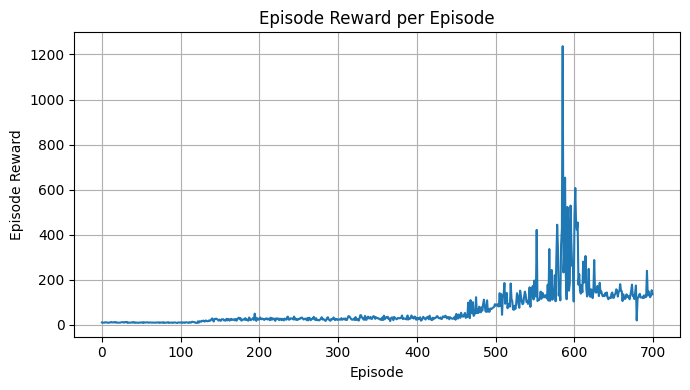

In [9]:
# Episode Reward vs. Episode
plt.figure(figsize=(7, 4))
plt.plot(reward_hist_tot1)

plt.xlabel('Episode')
plt.ylabel('Episode Reward')
plt.title('Episode Reward per Episode')
plt.grid(True)
# plt.ylim(-200, 15)
plt.tight_layout()
plt.show()

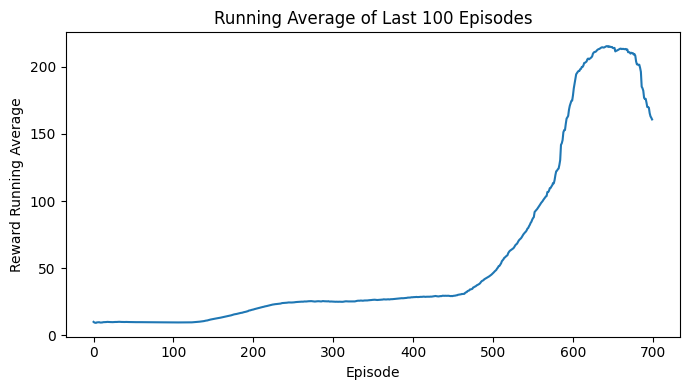

In [10]:
def plot_running_avg(totalrewards1):
    N = len(totalrewards1)
    running_avg1 = np.empty(N)
    for t in range(N):
        running_avg1[t] = totalrewards1[max(0, t-100):(t+1)].mean()
    plt.figure(figsize=(7, 4))
    plt.plot(running_avg1)
    plt.xlabel('Episode')
    plt.ylabel('Reward Running Average')
    plt.title("Running Average of Last 100 Episodes")
    plt.tight_layout()
    plt.show()
    
plot_running_avg(reward_hist_tot1)

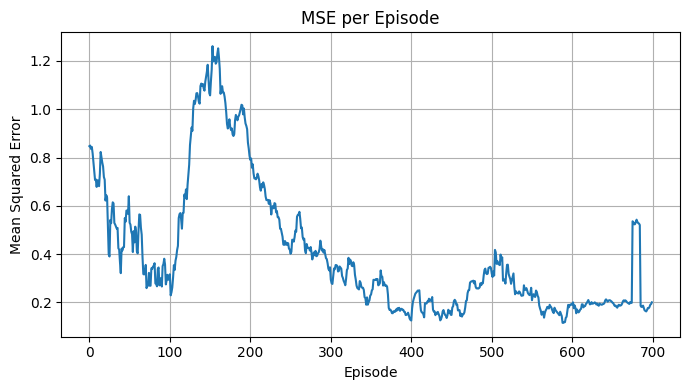

In [8]:
from scipy.ndimage import uniform_filter

mse_per_episode_avg1 = uniform_filter(mse_per_episode_tot1, size=10)

# MSE vs. Episode


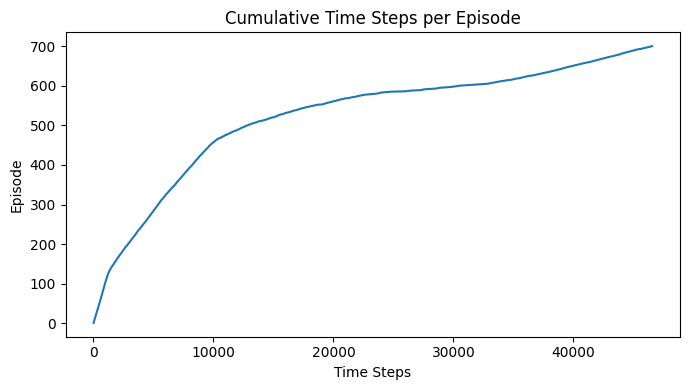

In [11]:
cumulative_steps1 = np.cumsum(ep_length_tot1)

# Cumulative Time Steps vs. Episode
plt.figure(figsize=(7, 4))
plt.plot(cumulative_steps1, range(1, n_episodes + 1))
plt.ylabel('Episode')
plt.xlabel('Time Steps')
plt.title('Cumulative Time Steps per Episode')
plt.tight_layout()
plt.show()

C:\Users\Victus\AppData\Local\Temp\ipykernel_10836\1547251498.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i//2, i%2].legend()


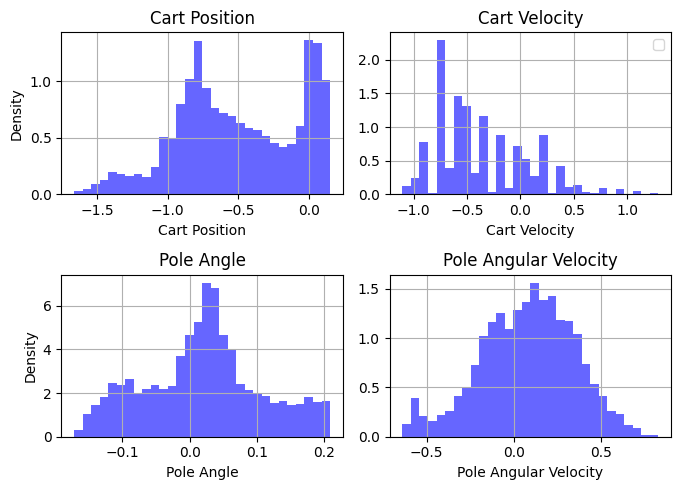